In [ ]:
pip install torch

In [ ]:
pip install torchvision

In [1]:
import numpy as np # linear algebra
import pandas as pd 

In [2]:
import os
import matplotlib.pyplot as plt

In [3]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader,random_split,TensorDataset
from torchvision.utils import make_grid
from torchvision.transforms import ToTensor
from torchvision.datasets import ImageFolder
import torchvision.transforms as transforms
import torchvision.models as models

In [4]:
from tqdm.notebook import tqdm

In [5]:
project_name = 'course-project-plant-disease-classification2'

In [6]:
data ='C:/Users/rjabj/Desktop/projects/projet detection des maladie des plante/PlantDoc-Dataset/'
os.listdir(data)

['test', 'train']

In [7]:
os.listdir(data+'train')

['Apple__leaf',
 'Apple__rust leaf',
 'Apple__Scab Leaf',
 'Bell pepper__leaf',
 'Bell pepper__leaf spot',
 'Blueberry__leaf',
 'Cherry__leaf',
 'Corn__Gray leaf spot',
 'Corn__leaf blight',
 'Corn__rust leaf',
 'grape__leaf',
 'grape__leaf black rot',
 'Peach__leaf',
 'Potato__leaf early blight',
 'Potato__leaf late blight',
 'Raspberry__leaf',
 'Soyabean__leaf',
 'Squash Powdery mildew__leaf',
 'Strawberry__leaf',
 'Tomato__Early blight leaf',
 'Tomato__leaf',
 'Tomato__leaf bacterial spot',
 'Tomato__leaf late blight',
 'Tomato__leaf mosaic virus',
 'Tomato__leaf yellow virus',
 'Tomato__mold leaf',
 'Tomato__Septoria leaf spot']

# Number of unique plants

In [8]:
unique_plants = []
cl = os.listdir(data+'train')
for i in cl:
    x = i.split('_')
    if x[0] not in unique_plants:
        unique_plants.append(x[0])
print("Number of Unique Plants: ",len(unique_plants))
print("Unique Plants: ",unique_plants)

Number of Unique Plants:  13
Unique Plants:  ['Apple', 'Bell pepper', 'Blueberry', 'Cherry', 'Corn', 'grape', 'Peach', 'Potato', 'Raspberry', 'Soyabean', 'Squash Powdery mildew', 'Strawberry', 'Tomato']


# Loading Training and Test Dataset as Tensor

In [9]:
transform = transforms.Compose(
    [transforms.Resize(size = 128),
     transforms.ToTensor()])

In [10]:
dataset = ImageFolder(data+'train',transform=transform)
test_ds = ImageFolder(data+'test',transform=transform)

In [11]:
print("Number of training images: ",len(dataset))
print("Number of testing images: ",len(test_ds))

Number of training images:  2316
Number of testing images:  236


# Number of classes

In [12]:
num_classes = dataset.classes
print("Number of classes: ",len(num_classes))
print(num_classes)

Number of classes:  27
['Apple__Scab Leaf', 'Apple__leaf', 'Apple__rust leaf', 'Bell pepper__leaf', 'Bell pepper__leaf spot', 'Blueberry__leaf', 'Cherry__leaf', 'Corn__Gray leaf spot', 'Corn__leaf blight', 'Corn__rust leaf', 'Peach__leaf', 'Potato__leaf early blight', 'Potato__leaf late blight', 'Raspberry__leaf', 'Soyabean__leaf', 'Squash Powdery mildew__leaf', 'Strawberry__leaf', 'Tomato__Early blight leaf', 'Tomato__Septoria leaf spot', 'Tomato__leaf', 'Tomato__leaf bacterial spot', 'Tomato__leaf late blight', 'Tomato__leaf mosaic virus', 'Tomato__leaf yellow virus', 'Tomato__mold leaf', 'grape__leaf', 'grape__leaf black rot']


# Visualising a single image

In [13]:
image, label  = dataset[0]
print("Image shape:",image.shape)
print("Image Label: ",label)
print("Image Label: ",dataset.classes[label])
print(image)

Image shape: torch.Size([3, 128, 197])
Image Label:  0
Image Label:  Apple__Scab Leaf
tensor([[[0.4196, 0.4902, 0.5294,  ..., 0.4000, 0.3373, 0.3020],
         [0.4196, 0.4588, 0.5059,  ..., 0.3216, 0.2980, 0.2863],
         [0.5059, 0.5020, 0.5373,  ..., 0.3098, 0.3216, 0.3137],
         ...,
         [0.6745, 0.6392, 0.6235,  ..., 0.6706, 0.8824, 0.9490],
         [0.6667, 0.6510, 0.6392,  ..., 0.6510, 0.8314, 0.9451],
         [0.6863, 0.6745, 0.6784,  ..., 0.6314, 0.7216, 0.8431]],

        [[0.5255, 0.6039, 0.6549,  ..., 0.3765, 0.2941, 0.2471],
         [0.5647, 0.6000, 0.6431,  ..., 0.2431, 0.2039, 0.1882],
         [0.6353, 0.6275, 0.6588,  ..., 0.1647, 0.1608, 0.1647],
         ...,
         [0.6314, 0.5412, 0.5098,  ..., 0.6863, 0.6980, 0.7059],
         [0.6196, 0.5608, 0.5255,  ..., 0.6824, 0.6902, 0.6980],
         [0.6510, 0.6235, 0.6078,  ..., 0.6824, 0.6980, 0.7059]],

        [[0.1294, 0.2118, 0.2667,  ..., 0.1922, 0.0980, 0.0471],
         [0.1451, 0.1961, 0.2471,  ..

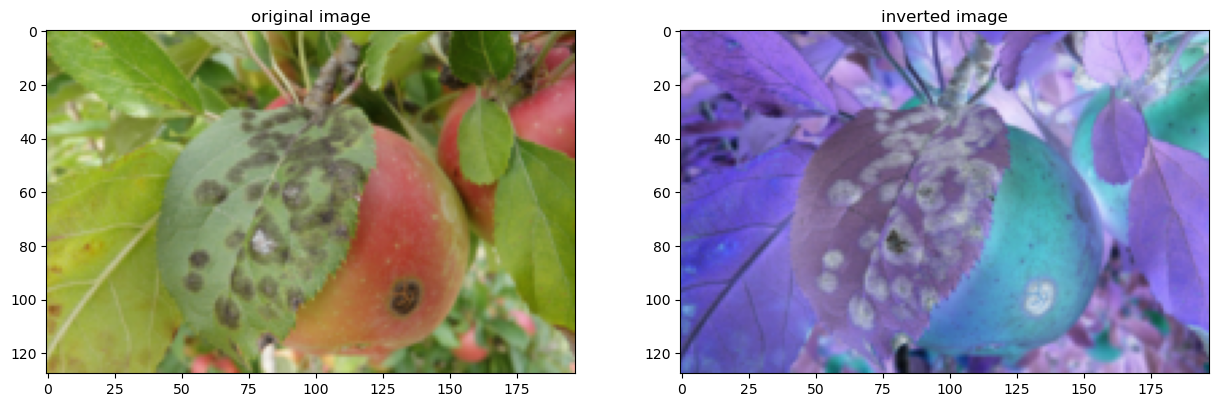

In [14]:
image, label  = dataset[0]
fig,(ax1,ax2) = plt.subplots(figsize=(15,5),nrows=1,ncols=2)
ax1.imshow(image.permute(1,2,0))
ax1.set_title("original image")
ax2.imshow(1-image.permute(1,2,0))
ax2.set_title("inverted image")
plt.show()

# Validation Dataset and Dataloader

In [15]:
import torch
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
from torchvision.utils import make_grid
import matplotlib.pyplot as plt

# Define transformations for resizing and converting images to tensors
transform = transforms.Compose([
    transforms.Resize((224, 224)),  # Resize all images to 128x128
    transforms.ToTensor(),         # Convert images to PyTorch tensors
])

# Define paths
train_dir = "C:/Users/rjabj/Desktop/projects/projet detection des maladie des plante/PlantDoc-Dataset/train"
test_dir = "C:/Users/rjabj/Desktop/projects/projet detection des maladie des plante/PlantDoc-Dataset/test"




In [16]:
# Load datasets
train_dataset = datasets.ImageFolder(root=train_dir, transform=transform)
test_dataset = datasets.ImageFolder(root=test_dir, transform=transform)

In [17]:


# Create DataLoaders
#train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)
#test_loader = DataLoader(test_dataset, batch_size=16, shuffle=False)

# Visualize a batch of images
#for images, labels in train_loader:
  #  fig, ax = plt.subplots(figsize=(20, 8))
  #  ax.set_xticks([])
   # ax.set_yticks([])
  #  ax.imshow(make_grid(images, nrow=16).permute(1, 2, 0))
  #  break

In [18]:
dataset = train_dataset
test_ds = test_dataset

In [19]:
random_seed = 42
torch.manual_seed(random_seed)

In [20]:
validation_split = 0.3
val_size = int(len(dataset) * validation_split)
train_size = len(dataset) - val_size

train_ds,val_ds = random_split(dataset,[train_size,val_size])

In [21]:
batch_size = 64

train_loader = DataLoader(train_ds,batch_size=batch_size,num_workers=2,shuffle=True, pin_memory=True)
val_loader = DataLoader(val_ds,batch_size=batch_size,num_workers=2,shuffle=True, pin_memory=True)
test_loader = DataLoader(test_ds,batch_size=batch_size,num_workers=2,shuffle=True, pin_memory=True)

# Visualising a Batch of images

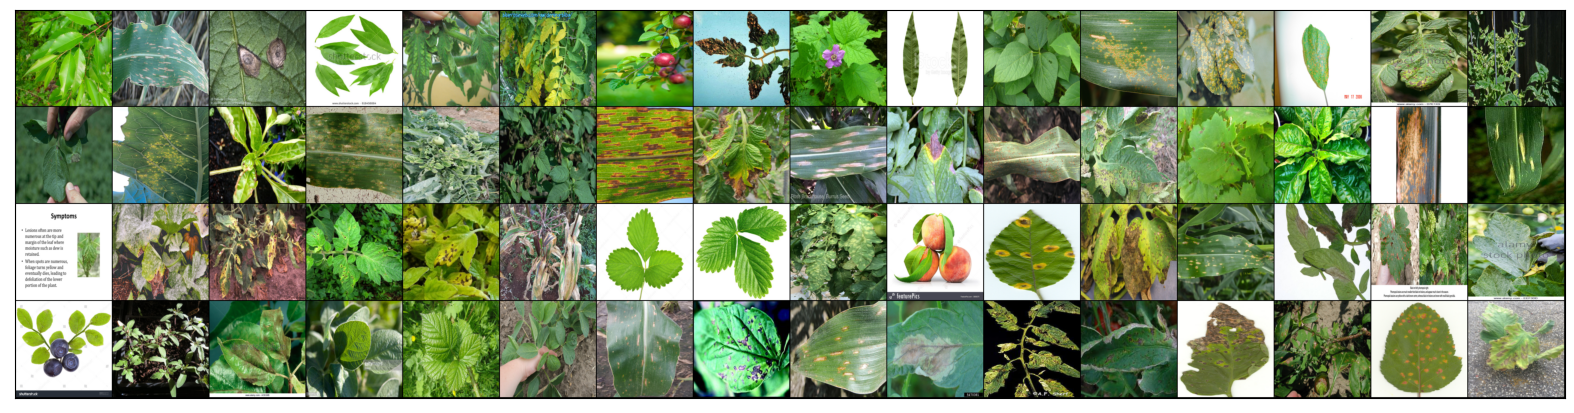

In [22]:
for images, labels in train_loader:
    fig, ax = plt.subplots(figsize=(20, 8))
    ax.set_xticks([]); ax.set_yticks([])
    ax.imshow(make_grid(images, nrow=16).permute(1, 2, 0))
    break

# Building The Model

### Building a Base Image Classification Mode 

In [23]:
def accuracy(outputs, labels):
  _, preds = torch.max(outputs, dim=1)
  return torch.tensor(torch.sum(preds == labels).item() / len(preds))


class ImageClassificationBase(nn.Module):
    
  def training_step(self,batch):
    images,labels = batch
    out = self(images)
    loss = F.cross_entropy(out,labels)
    return loss

  def validation_step(self,batch):
    images,labels = batch
    out = self(images)
    loss = F.cross_entropy(out,labels)
    acc = accuracy(out,labels)
    return {'val_loss':loss,'val_acc':acc}

  def validation_epoch_end(self,outputs):
    batch_loss = [out['val_loss'] for out in outputs]
    epoch_loss = torch.stack(batch_loss).mean()
    batch_acc = [out['val_acc'] for out in outputs]
    epoch_acc = torch.stack(batch_acc).mean()
    return {'val_loss':epoch_loss.item(),'val_acc':epoch_acc.item()}

  def epoch_end(self,epoch,result):
    print("Epoch [{}], train_loss: {:.4f}, val_loss: {:.4f}, val_acc: {:.4f}".format(epoch, result['train_loss'], result['val_loss'], result['val_acc']))

### Buiding a CNN model 

In [24]:
class Plant_Disease_Model(ImageClassificationBase):
  
  def __init__(self):
    super().__init__()
    self.network = nn.Sequential(
        nn.Conv2d(3,32,kernel_size=3,stride=1,padding=1),
        nn.ReLU(),
        nn.Conv2d(32,64,kernel_size=3,stride=1,padding=1),
        nn.ReLU(),
        nn.MaxPool2d(2,2), #output : 64*64*64

        nn.Conv2d(64,64,kernel_size=3,stride=1,padding=1),
        nn.ReLU(),
        nn.Conv2d(64,128,kernel_size=3,stride=1,padding=1),
        nn.ReLU(),
        nn.MaxPool2d(2,2), #output : 128*32*32

        nn.Conv2d(128,128,kernel_size=3,stride=1,padding=1),
        nn.ReLU(),
        nn.Conv2d(128,256,kernel_size=3,stride=1,padding=1),
        nn.ReLU(),
        nn.MaxPool2d(2,2), #output : 256*16*16
        
        nn.Conv2d(256,256,kernel_size=3,stride=1,padding=1),
        nn.ReLU(),
        nn.Conv2d(256,512,kernel_size=3,stride=1,padding=1),
        nn.ReLU(),
        nn.MaxPool2d(2,2), #output : 512*8*8
        
        nn.Conv2d(512,512,kernel_size=3,stride=1,padding=1),
        nn.ReLU(),
        nn.Conv2d(512,1024,kernel_size=3,stride=1,padding=1),
        nn.ReLU(),
        nn.MaxPool2d(2,2), #output : 1024*4*4
        nn.AdaptiveAvgPool2d(1),
        
        nn.Flatten(),
        nn.Linear(1024,512),
        nn.ReLU(),
        nn.Linear(512,256),
        nn.ReLU(),
        nn.Linear(256,38)
        )
    
  def forward(self,xb):
    out = self.network(xb)
    return out

### Building a VGG16 model using Transfer Learning 

In [25]:
class Plant_Disease_Model2(ImageClassificationBase):
  
  def __init__(self):
    super().__init__()
    self.network = models.vgg16(pretrained=True)
    num_ftrs = self.network.classifier[-1].in_features
    self.network.classifier[-1] = nn.Linear(num_ftrs, 38)
    
  def forward(self,xb):
    out = self.network(xb)
    return out

In [26]:
class Plant_Disease_Model1(ImageClassificationBase):
    def __init__(self):
        super().__init__()
        # Load the pretrained Vision Transformer model
        self.network = models.vit_b_16(pretrained=True)  # Use vit_b_16, vit_base_patch16_224, or other variants
        # Modify the final classification layer to match the number of classes (38)
        num_ftrs = self.network.heads[-1].in_features
        self.network.heads[-1] = nn.Linear(num_ftrs, 38)
    
    def forward(self, xb):
        return self.network(xb)

### Training and Evaluation 

In [27]:
@torch.no_grad()
def evaluate(model,val_loader):
  model.eval()
  outputs = [model.validation_step(batch) for batch in val_loader]
  return model.validation_epoch_end(outputs)

In [28]:
def fit(epochs, lr, model, train_loader, val_loader, opt_func=torch.optim.SGD):
  history = []
  optimizer = opt_func(model.parameters(), lr)
  for epoch in range(epochs):
    model.train()
    train_losses = []
    for batch in tqdm(train_loader):
      loss = model.training_step(batch)
      train_losses.append(loss)
      loss.backward()
      optimizer.step()
      optimizer.zero_grad()
    result = evaluate(model, val_loader)
    result['train_loss'] = torch.stack(train_losses).mean().item()
    model.epoch_end(epoch, result)
    history.append(result)
  return history

In [29]:
def get_default_device():
    """Pick GPU if available, else CPU"""
    if torch.cuda.is_available():
        return torch.device('cuda')
    else:
        return torch.device('cpu')
    
def to_device(data, device):
    """Move tensor(s) to chosen device"""
    if isinstance(data, (list,tuple)):
        return [to_device(x, device) for x in data]
    return data.to(device, non_blocking=True)

class DeviceDataLoader():
    """Wrap a dataloader to move data to a device"""
    def __init__(self, dl, device):
        self.dl = dl
        self.device = device
        
    def __iter__(self):
        """Yield a batch of data after moving it to device"""
        for b in self.dl: 
            yield to_device(b, self.device)

    def __len__(self):
        """Number of batches"""
        return len(self.dl)

In [30]:
device = get_default_device()
device

device(type='cpu')

In [31]:
train_loader = DeviceDataLoader(train_loader, device)
val_loader = DeviceDataLoader(val_loader, device)
test_loader = DeviceDataLoader(test_loader, device)

In [32]:
model = to_device(Plant_Disease_Model1(), device)

C:\Users\rjabj\anaconda3\lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
C:\Users\rjabj\anaconda3\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ViT_B_16_Weights.IMAGENET1K_V1`. You can also use `weights=ViT_B_16_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [33]:
model

Plant_Disease_Model1(
  (network): VisionTransformer(
    (conv_proj): Conv2d(3, 768, kernel_size=(16, 16), stride=(16, 16))
    (encoder): Encoder(
      (dropout): Dropout(p=0.0, inplace=False)
      (layers): Sequential(
        (encoder_layer_0): EncoderBlock(
          (ln_1): LayerNorm((768,), eps=1e-06, elementwise_affine=True)
          (self_attention): MultiheadAttention(
            (out_proj): NonDynamicallyQuantizableLinear(in_features=768, out_features=768, bias=True)
          )
          (dropout): Dropout(p=0.0, inplace=False)
          (ln_2): LayerNorm((768,), eps=1e-06, elementwise_affine=True)
          (mlp): MLPBlock(
            (0): Linear(in_features=768, out_features=3072, bias=True)
            (1): GELU(approximate='none')
            (2): Dropout(p=0.0, inplace=False)
            (3): Linear(in_features=3072, out_features=768, bias=True)
            (4): Dropout(p=0.0, inplace=False)
          )
        )
        (encoder_layer_1): EncoderBlock(
          

In [34]:
evaluate(model,val_loader)

{'val_loss': 3.710583448410034, 'val_acc': 0.02556818164885044}

In [35]:
history = fit(5, 0.001, model, train_loader, val_loader, opt_func = torch.optim.Adam)

  0%|          | 0/26 [00:00<?, ?it/s]

Epoch [0], train_loss: 3.4258, val_loss: 3.3509, val_acc: 0.0818


  0%|          | 0/26 [00:00<?, ?it/s]

Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x0000024FCFB0EB80>
Traceback (most recent call last):
  File "C:\Users\rjabj\anaconda3\lib\site-packages\torch\utils\data\dataloader.py", line 1604, in __del__
    self._shutdown_workers()
  File "C:\Users\rjabj\anaconda3\lib\site-packages\torch\utils\data\dataloader.py", line 1568, in _shutdown_workers
    w.join(timeout=_utils.MP_STATUS_CHECK_INTERVAL)
  File "C:\Users\rjabj\anaconda3\lib\multiprocessing\process.py", line 149, in join
    res = self._popen.wait(timeout)
  File "C:\Users\rjabj\anaconda3\lib\multiprocessing\popen_spawn_win32.py", line 108, in wait
    res = _winapi.WaitForSingleObject(int(self._handle), msecs)
KeyboardInterrupt: 


KeyboardInterrupt: 

# Plotting accuracy and losses

In [ ]:
def plot_losses(history):
    train_losses = [x.get('train_loss') for x in history]
    val_losses = [x['val_loss'] for x in history]
    plt.plot(train_losses, '-bx')
    plt.plot(val_losses, '-rx')
    plt.xlabel('epoch')
    plt.ylabel('loss')
    plt.legend(['Training', 'Validation'])
    plt.title('Loss vs. No. of epochs');

In [ ]:
def plot_accuracies(history):
    accuracies = [x['val_acc'] for x in history]
    plt.plot(accuracies, '-x')
    plt.xlabel('epoch')
    plt.ylabel('accuracy')
    plt.title('Accuracy vs. No. of epochs');

In [ ]:
plot_accuracies(history)

In [ ]:
plot_losses(history)

In [ ]:
evaluate(model,val_loader)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

# Function to get predictions and true labels from the DataLoader
def get_predictions(model, dataloader):
    all_preds = []
    all_labels = []
    model.eval()
    with torch.no_grad():
        for images, labels in dataloader:
            outputs = model(images)
            _, preds = torch.max(outputs, dim=1)
            all_preds.extend(preds.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())
    return all_labels, all_preds

# Get predictions and true labels from the validation or test set
true_labels, predictions = get_predictions(model, test_loader)

# Classification Report
report = classification_report(true_labels, predictions, target_names=num_classes)
print("Classification Report:")
print(report)

# Confusion Matrix
conf_matrix = confusion_matrix(true_labels, predictions)

# Plot Confusion Matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=num_classes, yticklabels=num_classes)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()


# Evaluation and Prediction on Test Data

In [ ]:
x = evaluate(model,test_loader)
x

# Prediction on some single image of test data

In [ ]:
def predict_image(img, model):
    xb = to_device(img.unsqueeze(0), device)
    yb = model(xb)
    _, preds  = torch.max(yb, dim=1)
    return dataset.classes[preds[0].item()]

In [ ]:
img, label = test_ds[25]
plt.imshow(img.permute(1, 2, 0))
print('Label:', dataset.classes[label], ', Predicted:', predict_image(img, model))

In [ ]:
img, label = test_ds[978]
plt.imshow(img.permute(1, 2, 0))
print('Label:', dataset.classes[label], ', Predicted:', predict_image(img, model))

In [ ]:
img, label = test_ds[2548]
plt.imshow(img.permute(1, 2, 0))
print('Label:', dataset.classes[label], ', Predicted:', predict_image(img, model))

# Saving the Model

In [ ]:
torch.save(model.state_dict(), 'plantDisease-ConvNEXT.pth')